# Libraries

In [134]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import json
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Loading the processed Data

In [120]:
X_train = pd.read_csv('/Users/raya/Desktop/fraud-detection/european-dataset/data/processed/X_train.csv')
X_test = pd.read_csv('/Users/raya/Desktop/fraud-detection/european-dataset/data/processed/X_test.csv')
y_train = pd.read_csv('/Users/raya/Desktop/fraud-detection/european-dataset/data/processed/y_train.csv')['Class']
y_test = pd.read_csv('/Users/raya/Desktop/fraud-detection/european-dataset/data/processed/y_test.csv')['Class']

In [121]:
y_train = y_train.ravel()
y_test = y_test.ravel()

# Training

In [122]:
model = RandomForestClassifier(random_state=42,class_weight='balanced')

In [123]:
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [124]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    cv=3,
    random_state=42,
    n_jobs=-1,
    scoring='f1',
)

In [125]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='f1')

In [130]:
best_model = RandomForestClassifier(**random_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=50, random_state=42)

In [131]:
y_pred = best_model.predict(X_test)

# Evaluation

In [132]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [133]:
metrics = {
    'Accuracy': float(accuracy),
    'Precision': float(precision),
    'Recall': float(recall),
    'F1-score': float(f1),
    'True Positives': float(tp),
    'False Positives': float(fp)
}
with open('/Users/raya/Desktop/fraud-detection/european-dataset/reports/random_forest/metrics.json', 'w') as f:
    json.dump(metrics, f,indent=4)

# pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(30).to_csv('/Users/raya/Desktop/fraud-detection/european-dataset/reports/random_forest/results.csv')

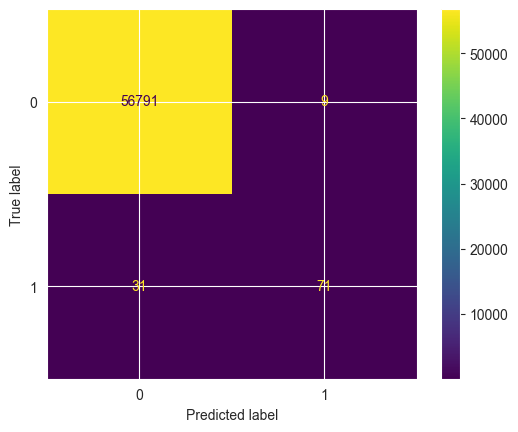

In [135]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()